In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn
# !pip install dmba
# !pip install statsmodels
# !pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/medical_clean.csv")
outcome = 'TotalCharge'

df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 
             'State', 'County', 'Zip', 'Lat', 'Lng', 'Interaction', 'TimeZone', 
              'Additional_charges'], axis=1)

cat_columns = df.select_dtypes(exclude="number").columns

# Give categorical columns a numeric value
for col in cat_columns:
    df[col] = pd.Categorical(df[col])
    df[col] = df[col].cat.codes

df.head()

,Population,Area,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,...,Initial_days,TotalCharge,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,2951,1,478,1,53,86575.93,0,1,0,19.141466,...,10.585770,3726.702860,3,3,2,2,4,3,3,4
1,11303,2,124,3,51,46805.99,1,0,0,18.940352,...,15.129562,4193.190458,3,4,3,4,4,4,3,3
2,17125,1,94,3,53,14370.14,4,0,0,18.057507,...,4.772177,2434.234222,2,4,4,4,3,4,3,3
3,2162,1,177,0,78,39741.49,1,1,0,16.576858,...,1.714879,2127.830423,3,5,5,3,4,5,5,5
4,5287,0,285,1,22,1209.56,4,0,0,17.439069,...,1.254807,2113.073274,2,1,3,3,5,3,4,3


In [3]:
# export prepared data
df.to_csv('data/medical_prepared.csv')

In [4]:
df['Complication_risk']

0       2
1       0
2       2
3       2
4       1
       ..
9995    2
9996    2
9997    0
9998    2
9999    1
Name: Complication_risk, Length: 10000, dtype: int8

# Univariate Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns




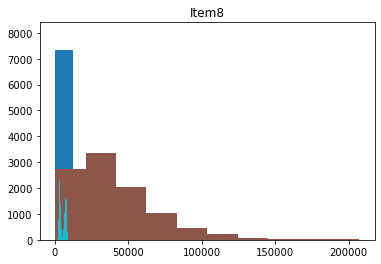

In [6]:
# perform univariate analysis on all columns

for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    
    path = 'plots/univariate-%s.png'%col
    plt.gcf().savefig(path)


# Bivariate Analysis

Since we are predicting Initial_days we will include Initial_days in our bivariate analysis of the features

/Users/curtishammons/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


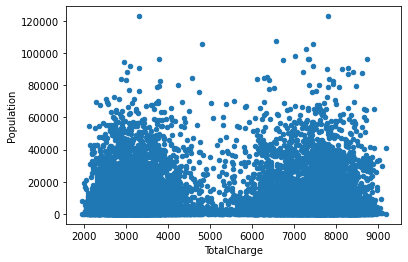

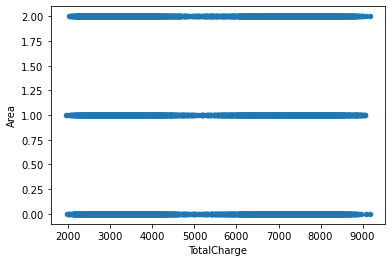

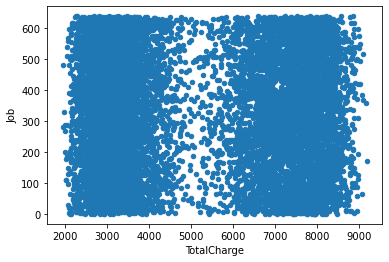

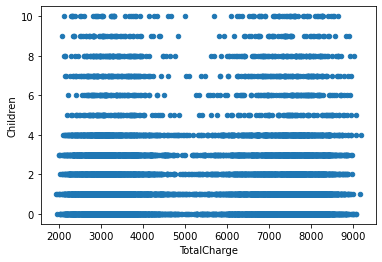

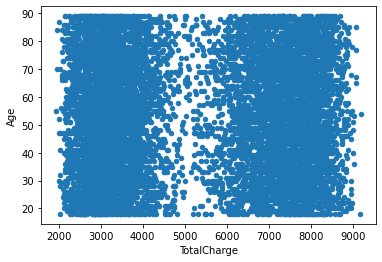

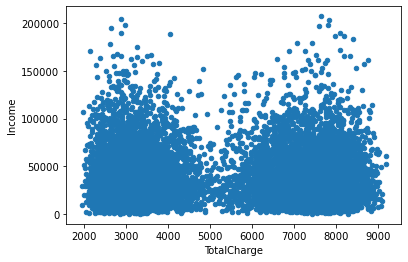

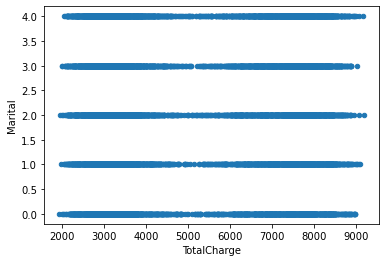

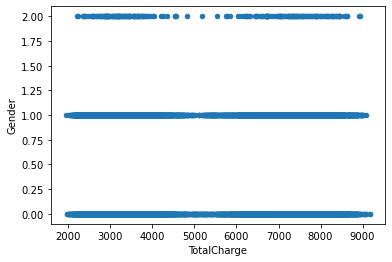

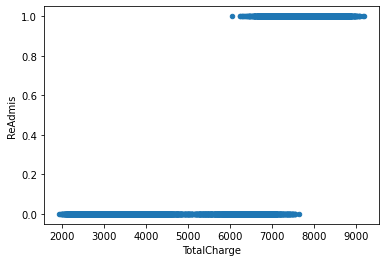

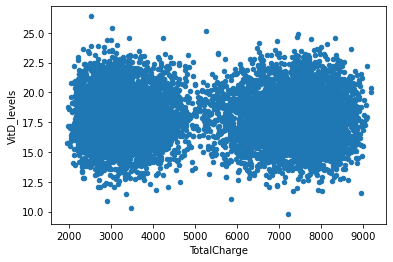

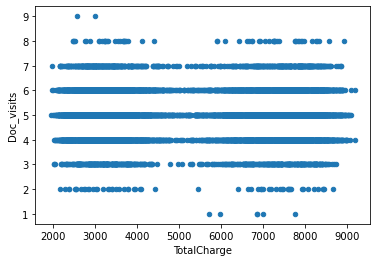

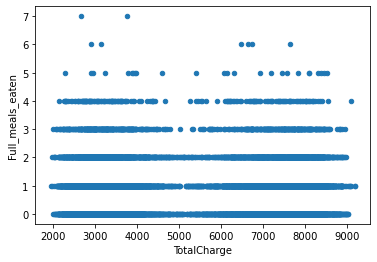

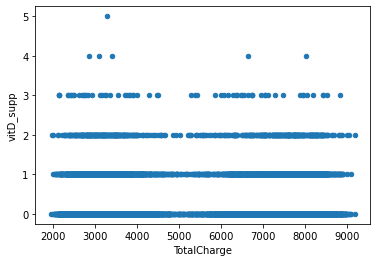

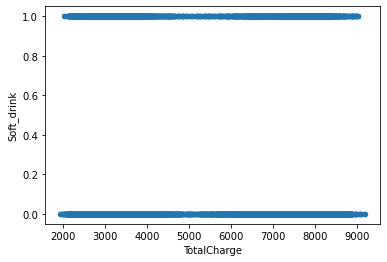

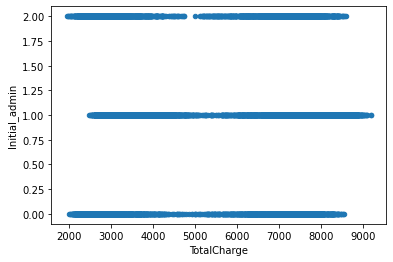

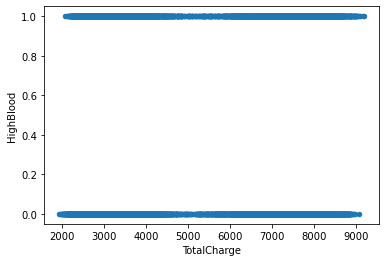

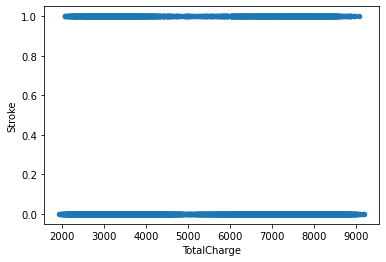

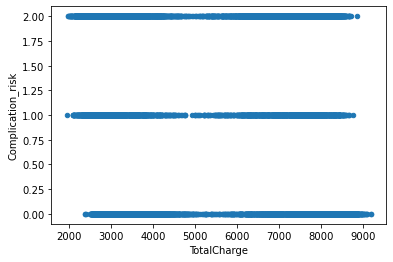

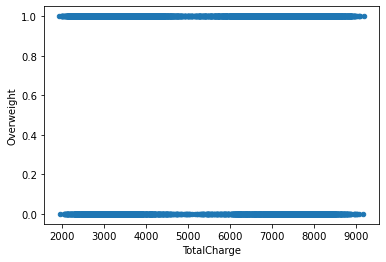

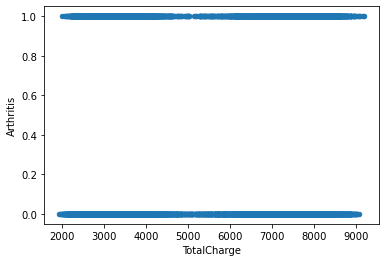

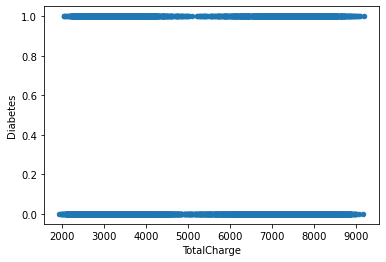

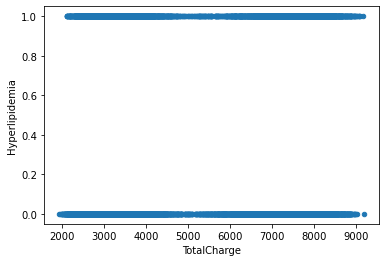

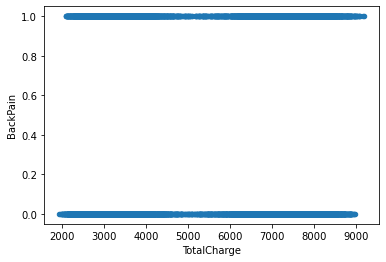

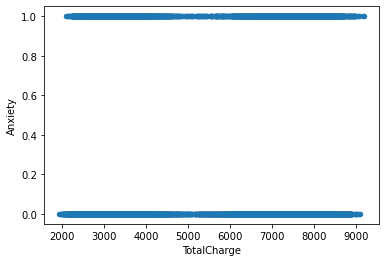

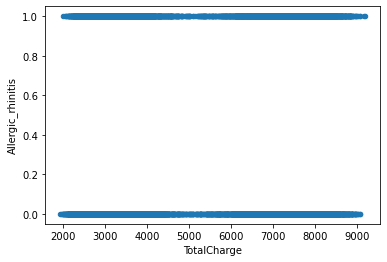

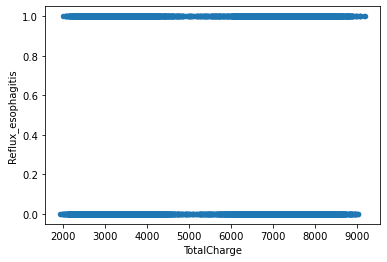

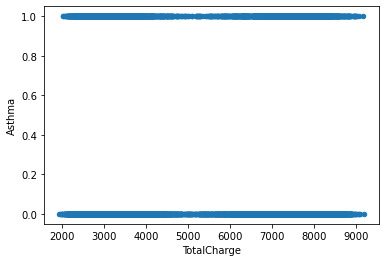

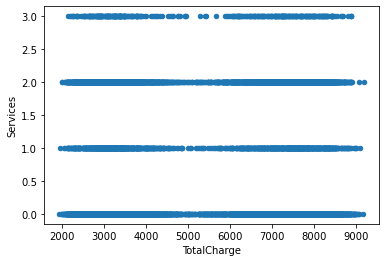

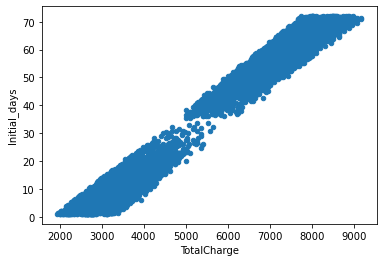

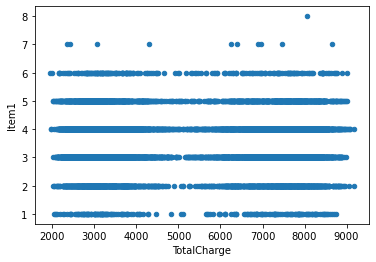

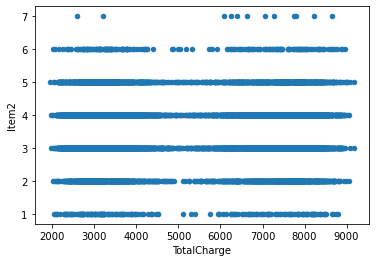

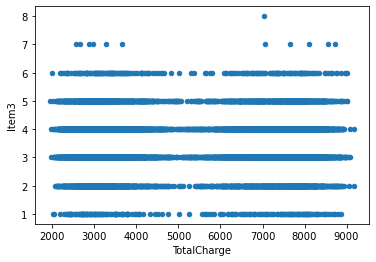

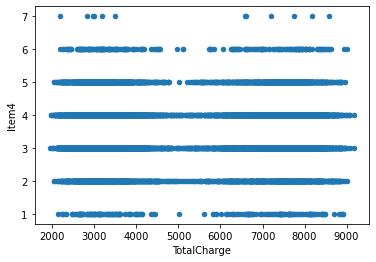

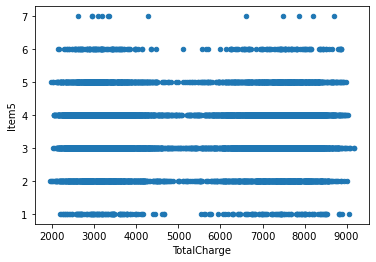

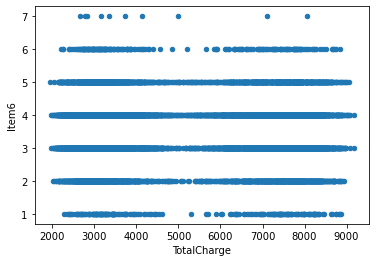

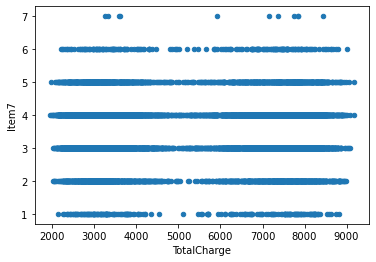

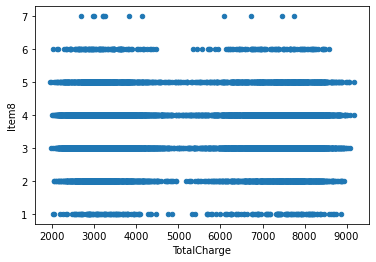

In [7]:
for col in df:
    if col != outcome:
        df.plot(kind='scatter', x=outcome, y=col)
        
        path = 'plots/bivariate-%s-%s.png'%(outcome,col)
        plt.gcf().savefig(path)


## Correlation Matrix

In [8]:
correl = df.corr()
display(correl)

,Population,Area,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,...,Initial_days,TotalCharge,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Population,1.000000,0.016819,-0.005268,0.002462,-0.018987,0.005426,-0.014382,0.009576,0.020040,0.002651,...,0.017469,0.019188,0.014312,0.023612,-0.001248,-0.004660,0.008705,0.008159,0.010034,-0.000220
Area,0.016819,1.000000,0.002513,-0.004164,-0.007530,0.010067,-0.001309,0.000293,0.008438,0.033479,...,0.012432,0.014134,-0.001277,0.003957,0.001747,-0.007326,-0.020585,-0.002907,-0.017908,-0.007678
Job,-0.005268,0.002513,1.000000,-0.015621,-0.009102,0.018433,0.002783,-0.012618,0.005645,0.008496,...,0.006175,0.005959,-0.002972,0.000669,0.008988,-0.007250,0.021222,-0.008718,0.002031,-0.005742
Children,0.002462,-0.004164,-0.015621,1.000000,0.009836,0.007176,-0.020535,-0.004791,0.023532,0.009487,...,0.022467,0.024100,0.002138,0.001674,-0.002094,0.000728,0.012564,-0.008546,0.004156,-0.019753
Age,-0.018987,-0.007530,-0.009102,0.009836,1.000000,-0.012228,-0.002227,-0.013305,0.015810,0.010315,...,0.016264,0.016876,0.005552,0.003967,0.004709,0.003377,-0.008827,-0.002087,0.009423,-0.003367
Income,0.005426,0.010067,0.018433,0.007176,-0.012228,1.000000,-0.010381,0.003568,-0.011504,-0.013115,...,-0.012465,-0.014345,-0.003494,-0.008182,-0.003782,-0.004301,-0.010642,0.001021,-0.000502,0.021178
Marital,-0.014382,-0.001309,0.002783,-0.020535,-0.002227,-0.010381,1.000000,-0.006871,0.015036,-0.005928,...,0.020396,0.019451,0.004075,0.003627,0.011325,-0.007841,-0.014444,0.002740,0.003998,0.015369
Gender,0.009576,0.000293,-0.012618,-0.004791,-0.013305,0.003568,-0.006871,1.000000,0.012504,-0.007670,...,0.008438,0.007538,0.011526,0.016654,0.018502,-0.014537,0.008995,-0.012165,-0.000330,0.005252
ReAdmis,0.020040,0.008438,0.005645,0.023532,0.015810,-0.011504,0.015036,0.012504,1.000000,0.004083,...,0.850862,0.843726,-0.016785,-0.002423,-0.011699,-0.001983,0.005614,-0.016894,-0.004974,-0.016740
VitD_levels,0.002651,0.033479,0.008496,0.009487,0.010315,-0.013115,-0.005928,-0.007670,0.004083,1.000000,...,-0.003642,-0.001403,0.013711,0.003979,-0.012103,-0.009872,0.006605,0.006887,-0.009832,-0.021074


In [9]:
abs(df.corr())[outcome].sort_values(ascending=False)

TotalCharge           1.000000
Initial_days          0.987640
ReAdmis               0.843726
Complication_risk     0.084016
BackPain              0.035828
Arthritis             0.032932
Anxiety               0.031199
Reflux_esophagitis    0.026284
Children              0.024100
HighBlood             0.019910
Item1                 0.019706
Marital               0.019451
Population            0.019188
Allergic_rhinitis     0.018919
Hyperlipidemia        0.017565
vitD_supp             0.016924
Age                   0.016876
Income                0.014345
Full_meals_eaten      0.014306
Asthma                0.014290
Area                  0.014134
Overweight            0.012782
Diabetes              0.011524
Item6                 0.010480
Item4                 0.010318
Item3                 0.009051
Item8                 0.008250
Gender                0.007538
Services              0.007425
Item2                 0.006055
Job                   0.005959
Initial_admin         0.005577
Soft_dri

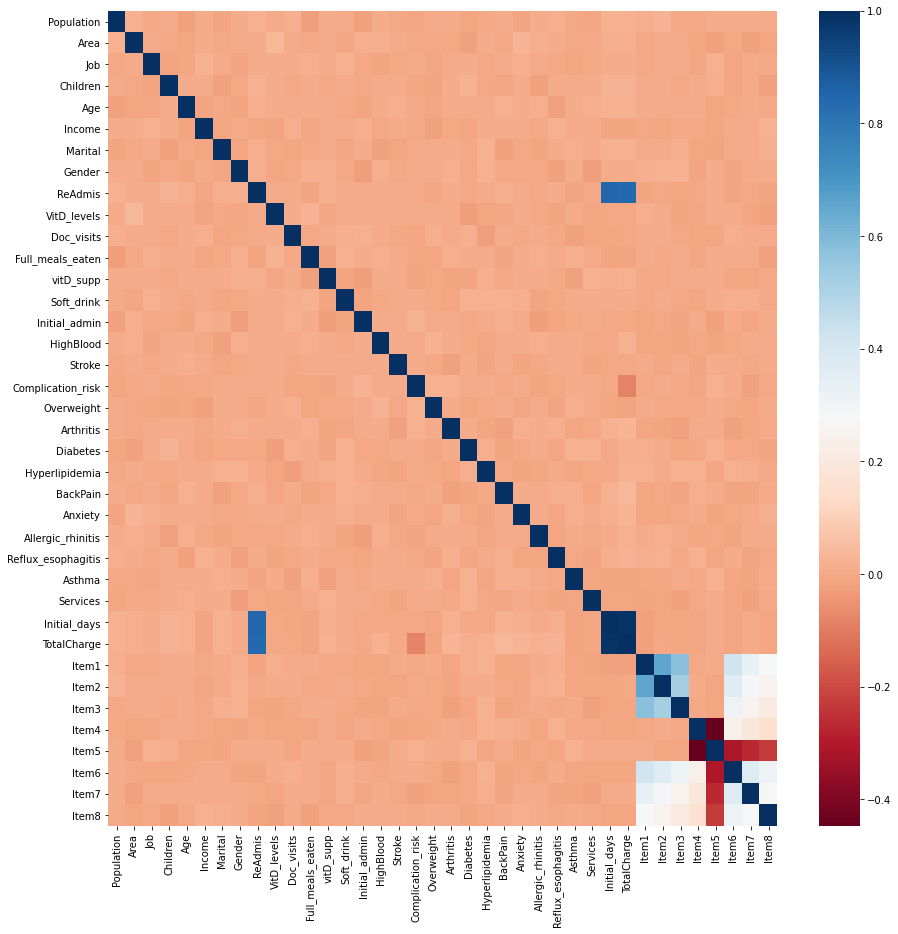

In [10]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(correl, xticklabels = correl.columns, yticklabels = correl.columns, cmap='RdBu')

heatmap.get_figure().savefig('plots/heatmap.png')

# Regression Models

We start with a regression model with all of the features

In [11]:
import statsmodels.api as sm

In [12]:
X = df.loc[:,df.columns!=outcome]
y = df[outcome]

In [13]:
Xc = sm.add_constant(X)

initial_model = sm.OLS(y,Xc)
results = initial_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.757e+04
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:58:02   Log-Likelihood:                -70095.
No. Observations:               10000   AIC:                         1.403e+05
Df Residuals:                    9962   BIC:                         1.405e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2373.9189     39.273     60.447      0.000    2296.936    2450.902
Population             0.0002      0.000      0.857      0.391      -0.000       0.001
Area                   2.2503      3.295      0.683      0.495      -4.209       8.709
Job                    0.0017      0.015      0.116      0.908      -0.027       0.030
Children               1.0233      1.243      0.823      0.410      -1.413       3.460
Age                   -0.0651      0.130     -0.500      0.617      -0.321       0.190
Income                -0.0002   9.43e-05     -2.236      0.025      -0.000    -2.6e-05
Marital                0.2577      1.901      0.136      0.892      -3.468       3.983
Gender                -3.8541      4.975     -0.775      0.439     -13.606       5.898
ReAdmis               64.9655     10.619      6.118      0.000      44.150      85.781
VitD_levels            3.6056      1.334      2.702      0.007       0.990       6.221
Doc_visits             1.2634      2.572      0.491      0.623      -3.777       6.304
Full_meals_eaten       2.0040      2.669      0.751      0.453      -3.228       7.236
vitD_supp             -0.3011      4.280     -0.070      0.944      -8.690       8.088
Soft_drink            13.0903      6.151      2.128      0.033       1.034      25.147
Initial_admin          3.0023      3.829      0.784      0.433      -4.504      10.509
HighBlood            116.0854      5.469     21.225      0.000     105.364     126.806
Stroke                -5.9423      6.725     -0.884      0.377     -19.126       7.241
Complication_risk   -202.7614      3.056    -66.339      0.000    -208.753    -196.770
Overweight            -4.2107      5.921     -0.711      0.477     -15.817       7.395
Arthritis             71.9939      5.612     12.829      0.000      60.994      82.994
Diabetes              69.0255      6.034     11.439      0.000      57.197      80.854
Hyperlipidemia       104.6833      5.691     18.394      0.000      93.527     115.839
BackPain              82.6641      5.467     15.121      0.000      71.948      93.380
Anxiety               91.7487      5.757     15.936      0.000      80.463     103.035
Allergic_rhinitis     62.6634      5.504     11.385      0.000      51.874      73.452
Reflux_esophagitis    60.3537      5.463     11.047      0.000      49.645      71.063
Asthma                -3.6355      5.930     -0.613      0.540     -15.260       7.989
Services               1.1902      2.726      0.437      0.662      -4.153       6.533
Initial_days          80.7508      0.195    414.836      0.000      80.369      81.132
Item1                 -1.4153      3.871     -0.366      0.715      -9.002       6.172
Item2                  0.4276      3.571      0.120      0.905      -6.572       7.427
Item3                  4.3268      3.2

## Data Reduction

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regression = LinearRegression(normalize=False,fit_intercept=True)

Xc = sm.add_constant(X)


def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))

r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(Xc,y) - r2_est(Xc.values [:,selection],y)) ,Xc.columns[j]))


best_variables = list()

for imp, varname in sorted(r2_impact, reverse=True):
    if imp >= 0.0005:
        best_variables.append(varname)
    print ('%6.5f %s' %  (imp, varname))

    # New dataset with reduced features
df_reduced = df[best_variables]
df_reduced.head()

0.26081 Initial_days
0.00667 Complication_risk
0.00068 HighBlood
0.00051 Hyperlipidemia
0.00039 Anxiety
0.00035 BackPain
0.00025 Arthritis
0.00020 Diabetes
0.00020 Allergic_rhinitis
0.00019 Reflux_esophagitis
0.00006 ReAdmis
0.00001 VitD_levels
0.00001 Income
0.00001 Soft_drink
0.00001 Item5
0.00000 Item6
0.00000 Item3
0.00000 Stroke
0.00000 Population
0.00000 Children
0.00000 Gender
0.00000 Item7
0.00000 Initial_admin
0.00000 Full_meals_eaten
0.00000 Overweight
0.00000 Area
0.00000 Asthma
0.00000 Age
0.00000 Doc_visits
0.00000 Item1
0.00000 Services
0.00000 Item4
0.00000 Marital
0.00000 Job
0.00000 Item2
0.00000 vitD_supp
0.00000 const


,Initial_days,Complication_risk,HighBlood,Hyperlipidemia
0,10.585770,2,1,0
1,15.129562,0,1,0
2,4.772177,2,1,0
3,1.714879,2,0,0
4,1.254807,1,0,1


In [15]:
# export reduced data
df_reduced.to_csv('data/medical_reduced.csv')

In [16]:
X_reduced = df_reduced.loc[:,df_reduced.columns!=outcome]
Xc_reduced = sm.add_constant(X_reduced)

model_reduced = sm.OLS(y,Xc_reduced)
results = model_reduced.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.466e+05
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:58:03   Log-Likelihood:                -70618.
No. Observations:               10000   AIC:                         1.412e+05
Df Residuals:                    9995   BIC:                         1.413e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2633.9858      6.647    396.278      0.000    2620.957    2647.015
Initial_days         81.8533      0.107    762.670      0.000      81.643      82.064
Complication_risk  -202.0708      3.209    -62.964      0.000    -208.362    -195.780
HighBlood           118.2329      5.743     20.587      0.000     106.975     129.491
Hyperlipidemia      103.9143      5.973     17.398      0.000      92.206     115.622
==============================================================================
Omnibus:                   230247.214   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.763
Skew:                          -0.037   Prob(JB):                    1.05e-165
Kurtosis:                       1.652   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

In [17]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot



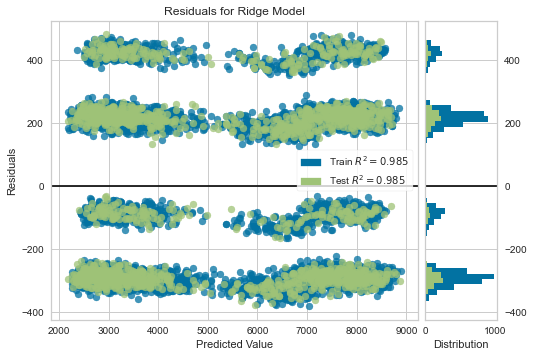

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
residual = visualizer.poof()

residual.get_figure().savefig('plots/residual-plot.png')

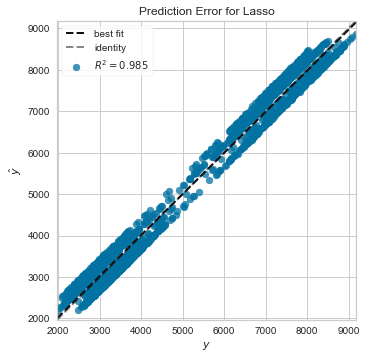

In [19]:
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
prediction_error = visualizer.poof()

prediction_error.get_figure().savefig('plots/prediction_error.png')